In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics # classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score


from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns=iris_load.feature_names)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
iris['class']=iris_load.target
display(iris.dtypes)
display(iris.describe())

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


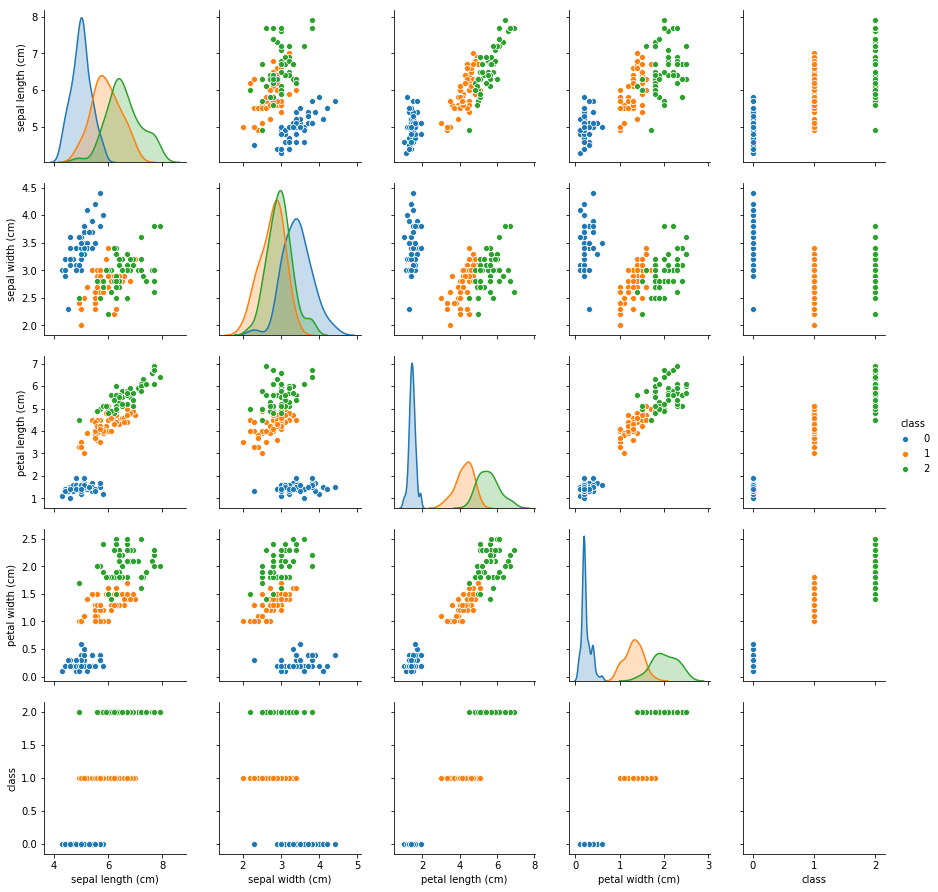

In [51]:
sns.pairplot(iris, hue='class')

## Decisions Trees for Classification

In [52]:
#Define explanatory and predicted variables
features=['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']
flower_class=['class']
x=iris[features]
y=iris[flower_class]

In [53]:
#split test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [54]:
# try to classify using Decion Tree Classifier
DTClass = DecisionTreeClassifier()
DTClass.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
# let's see how well our model does in predicting the classes on the input test data
y_pred=DTClass.predict(x_test)

In [56]:
# Now let's look at how well our model did using different metrics
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [57]:
# Now let's look at how important each input predictor or feature is in classifying the Iris classes
prediction_importance = list(DTClass.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
[print('For feature {} Relative Importance is {}'.format(*rows)) for rows in sorted(input_importance)];

For feature petal length (cm) Relative Importance is 0.5810298710673659
For feature petal width (cm) Relative Importance is 0.3853889344015715
For feature sepal length (cm) Relative Importance is 0.0
For feature sepal width (cm) Relative Importance is 0.0335811945310626


## Random Forest (Classification)

##### Use random forests instead of single decision tree model to solve for greedy principle downside and prevent over-fitting

In [58]:
# Create the model with 100 trees
RFC = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

In [59]:
RFC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred = RFC.predict(x_test)

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Ultimately little difference due to how well correlated the input data is 

## Decisions Trees for Regression

In [26]:
features = [ 'sepal length (cm)', 'sepal width (cm)', 'petal width (cm)' ]
output = ['petal length (cm)']
x=iris[features]
y=iris[output]

In [29]:
regressor = DecisionTreeRegressor(random_state=0) #equivalent to "DTClass" produced for Classification problem

In [31]:
#split training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [32]:
#fit model to training data
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [33]:
#run model
y_pred=regressor.predict(x_test)

In [34]:
score = regressor.score(x_test, y_test)
print (score)  

0.9431346936705008


In [35]:
score = cross_val_score(regressor, x_test, y_test, cv =10)
print (score)  

[0.7519084  0.97206619 0.02040816 0.90137328 0.92307692 0.95266895
 0.90631164 0.85557857 0.97817048 0.79652466]


In [38]:
#see how effective it is 
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error is: 0.3940344628262061


In [39]:
# Now let's look at how important each input predictor or feature is in understanding petal length
prediction_importance = list(regressor.feature_importances_)
input_importance = [(feature, importance) for feature, importance in zip(features, prediction_importance)]
[print('For feature {} Relative Importance is {}'.format(*rows)) for rows in sorted(input_importance)];

For feature petal width (cm) Relative Importance is 0.9470651145101956
For feature sepal length (cm) Relative Importance is 0.04872659478572973
For feature sepal width (cm) Relative Importance is 0.004208290704074727
